In [1]:
import pandas as pd
prefix_url='https://graphemy.ir/datasets'
def get_file(name):
    file_name=name if '.csv' in name else f'{name}.csv'
    return f'{prefix_url}/{file_name}'

df=pd.read_csv(get_file('Churn_Modelling'))
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
X=df[['CreditScore','Age', 'EstimatedSalary', 'Balance']].values
y=df['Exited'].values

In [6]:
X.shape

(10000, 4)

In [7]:
y.shape

(10000,)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,test_size=0.2)

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input

In [13]:
X.shape

(10000, 4)

In [14]:
model=Sequential()
model.add(Input(shape=(4 ,)))
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 631 (2.46 KB)

 Trainable params: 631 (2.46 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [17]:
model.fit(X_train,y_train,epochs=200,batch_size=32)

Epoch 1/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7898 - loss: 0.5684
Epoch 2/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7913 - loss: 0.4950
Epoch 3/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7970 - loss: 0.4616
Epoch 4/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7903 - loss: 0.4555
Epoch 5/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7847 - loss: 0.4571
Epoch 6/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7837 - loss: 0.4527
Epoch 7/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7972 - loss: 0.4384
Epoch 8/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7794 - loss: 0.4634
Epoch 9/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7937 - loss: 0.4416
Epoch 10/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7897 - loss: 0.4458
Epoch 11/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7874 - loss: 0.4459
Epoch 12/200
250/250 ━━━━━━━━━━━━━━━━━━━━

In [18]:
predictions=model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [19]:
predictions[0]

array([0.09519855], dtype=float32)

In [20]:
predictions[:10]

array([[0.09519855],
       [0.09814321],
       [0.68056005],
       [0.20283288],
       [0.23953408],
       [0.20923431],
       [0.18872403],
       [0.13852108],
       [0.10959362],
       [0.02770828]], dtype=float32)

In [24]:
import numpy as np

In [25]:
np.max(predictions)

np.float32(0.8713806)

In [26]:
np.min(predictions)

np.float32(0.021404242)

In [27]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
np.max(y_test) , np.min(y_test)

(np.int64(1), np.int64(0))

In [29]:
(predictions > 0.5)

array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [30]:
y_hat=(predictions > 0.5).astype(int)
y_hat

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      1595
           1       0.53      0.24      0.33       405

    accuracy                           0.80      2000
   macro avg       0.68      0.59      0.61      2000
weighted avg       0.77      0.80      0.77      2000



In [32]:
def fit_model(optimizer:str='sgd'):
  model=Sequential()
  model.add(Input(shape=(4 ,)))
  model.add(Dense(30,activation='relu'))
  model.add(Dense(15,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['mean_squared_error'])
  return model.fit(X_train,y_train,batch_size=32,epochs=100)


In [34]:
losses={}
optimizers=['sgd','adam','AdamW']
for optimizer in optimizers:
  history=fit_model(optimizer)
  losses[optimizer]=history.history['loss']

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2117 - mean_squared_error: 0.2117
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1688 - mean_squared_error: 0.1688
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1669 - mean_squared_error: 0.1669
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1636 - mean_squared_error: 0.1636
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1605 - mean_squared_error: 0.1605
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1653 - mean_squared_error: 0.1653
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1663 - mean_squared_error: 0.1663
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1605 - mean_squared_error: 0.1605
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1618 - mean_squared_error: 0.1618
Epoch 11/100
250/250 ━━━━━━━━

In [37]:
import matplotlib.pyplot as plt

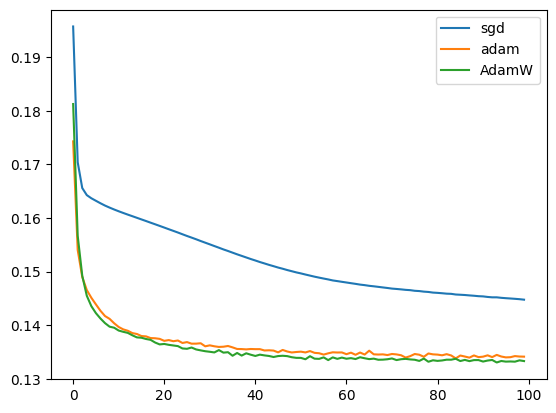

In [38]:
for name,loss in losses.items():
  plt.plot(loss,label=name)

plt.legend()